In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 

df=pd.read_csv(r'C:\Users\kouas\OneDrive\Documents\mes dataset\loan_data_cleaned.csv')
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Male,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,Y
377,LP002974,Male,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,Y
378,LP002978,Female,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,Y
379,LP002979,Male,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,Y


In [70]:
df.isna().mean()

Id_pret                    0.0
Genre                      0.0
Marié                      0.0
Nombre_de_dépendants       0.0
Niveau_d_études            0.0
Travailleur_indépendant    0.0
Revenu_du_demandeur        0.0
Revenu_du_co-demandeur     0.0
Montant_du_prêt            0.0
Durée_du_prêt              0.0
Historique_de_crédit       0.0
Zone_propriété             0.0
Statut_du_prêt             0.0
dtype: float64

Historique_de_crédit
1.0    324
0.0     57
Name: count, dtype: int64


Text(0.5, 1.0, "Distribution de l'historique de crédit")

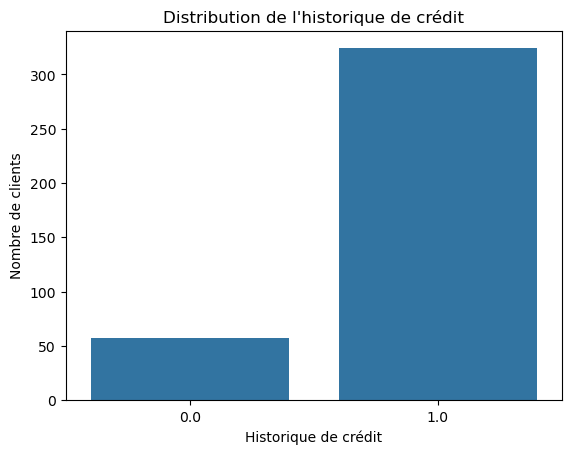

In [127]:
hist_crdt=df["Historique_de_crédit"].value_counts()
print(hist_crdt)
sns.countplot(data=df, x='Historique_de_crédit')
plt.xlabel("Historique de crédit")
plt.ylabel("Nombre de clients")
plt.title("Distribution de l'historique de crédit")


In [72]:
df.describe(include='all')

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
count,381,381,381,381,381,381,381.000000,381.000000,381.000000,381.000000,381.000000,381,381
unique,381,3,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001003,Male,Oui,0,Diplômé,Non,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,291,228,242,278,346,NaN,NaN,NaN,NaN,NaN,149,271
mean,NaN,NaN,NaN,NaN,NaN,NaN,3579.845144,1277.275381,104.986877,341.417323,0.850394,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1419.813818,2340.818114,28.358464,67.625957,0.357154,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2600.000000,0.000000,90.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3333.000000,983.000000,110.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,4288.000000,2016.000000,127.000000,360.000000,1.000000,NaN,NaN


In [73]:
df["Statut_du_prêt"]=df["Statut_du_prêt"].str.replace('Y','Accordé')
df["Statut_du_prêt"]=df["Statut_du_prêt"].str.replace('N','Refusé')
df.to_csv(r'C:\Users\kouas\OneDrive\Documents\mes dataset\loan_data_cleaned_2.csv', index=False)
 

Statut_du_prêt
1.0    271
0.0    110
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribution du statut du prêt')

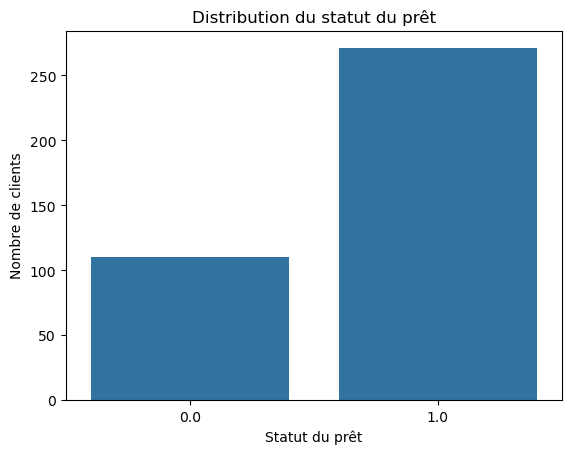

In [110]:
stat_pret=df["Statut_du_prêt"].value_counts()
print(stat_pret)
sns.countplot(data=df, x='Statut_du_prêt')
plt.xlabel("Statut du prêt")
plt.ylabel("Nombre de clients")
plt.title("Distribution du statut du prêt")

In [75]:
df.columns

Index(['Id_pret', 'Genre', 'Marié', 'Nombre_de_dépendants', 'Niveau_d_études',
       'Travailleur_indépendant', 'Revenu_du_demandeur',
       'Revenu_du_co-demandeur', 'Montant_du_prêt', 'Durée_du_prêt',
       'Historique_de_crédit', 'Zone_propriété', 'Statut_du_prêt'],
      dtype='object')

Historique_de_crédit  Statut_du_prêt
0.0                   0.0                54
                      1.0                 3
1.0                   1.0               268
                      0.0                56
Name: count, dtype: int64


Text(0.5, 1.0, 'Statut du prêt par Historique de crédit')

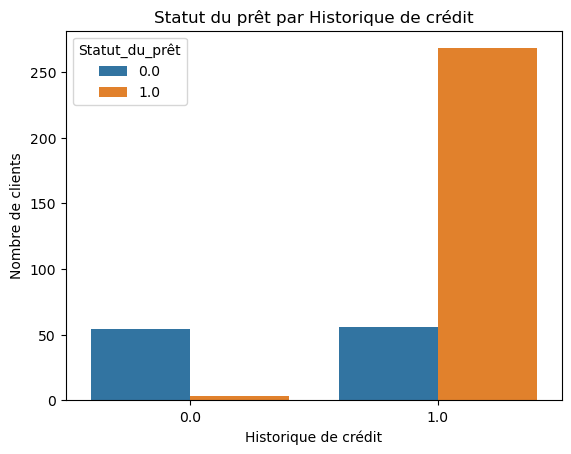

In [109]:
stat_hist=df.groupby("Historique_de_crédit")["Statut_du_prêt"].value_counts().unstack() 
sns.countplot(data=df, x='Historique_de_crédit', hue='Statut_du_prêt')
print(df.groupby("Historique_de_crédit")["Statut_du_prêt"].value_counts())
#ceci permet de visualiser la distribution du statut du prêt en fonction de l'historique de crédit
plt.xlabel("Historique de crédit")
plt.ylabel("Nombre de clients")
plt.title("Statut du prêt par Historique de crédit")

In [77]:
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Male,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,Refusé
1,LP001005,Male,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,Accordé
2,LP001006,Male,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,Accordé
3,LP001008,Male,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,Accordé
4,LP001013,Male,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,Accordé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,Accordé
377,LP002974,Male,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,Accordé
378,LP002978,Female,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,Accordé
379,LP002979,Male,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,Accordé


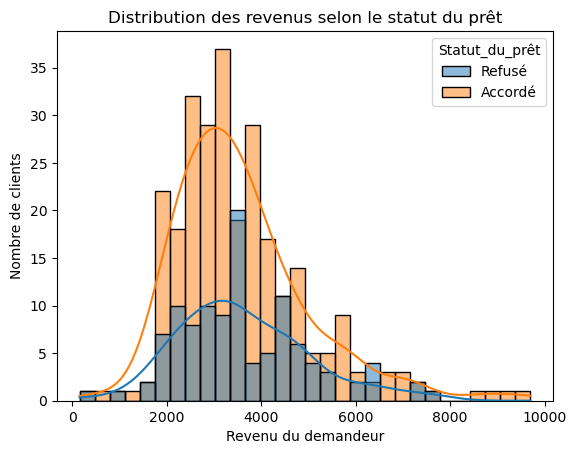

In [78]:
sns.histplot(data=df, x='Revenu_du_demandeur', hue='Statut_du_prêt', bins=30, kde=True)
#ce code permet de visualiser la distribution des revenus en fonction du statut du prêt
plt.title("Distribution des revenus selon le statut du prêt")
plt.xlabel("Revenu du demandeur")
plt.ylabel("Nombre de clients")
plt.show()
 


Niveau_d_études  Statut_du_prêt
Diplômé          1.0               202
                 0.0                76
Non diplômé      1.0                69
                 0.0                34
Name: count, dtype: int64


Text(0.5, 1.0, "Statut du prêt par Niveau d'études")

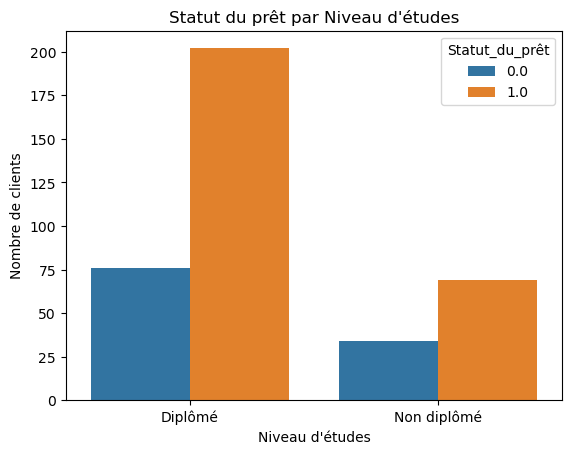

In [ ]:
n_acc=df.groupby("Niveau_d_études")["Statut_du_prêt"].value_counts()#ce code permet de visualiser la distribution du statut du prêt en fonction du niveau d'études 
print(n_acc)
sns.countplot(data=df, x='Niveau_d_études', hue='Statut_du_prêt')
plt.xlabel("Niveau d'études")   
plt.ylabel("Nombre de clients")
plt.title("Statut du prêt par Niveau d'études")

In [80]:
df.columns

Index(['Id_pret', 'Genre', 'Marié', 'Nombre_de_dépendants', 'Niveau_d_études',
       'Travailleur_indépendant', 'Revenu_du_demandeur',
       'Revenu_du_co-demandeur', 'Montant_du_prêt', 'Durée_du_prêt',
       'Historique_de_crédit', 'Zone_propriété', 'Statut_du_prêt'],
      dtype='object')

In [81]:
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Male,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,Refusé
1,LP001005,Male,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,Accordé
2,LP001006,Male,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,Accordé
3,LP001008,Male,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,Accordé
4,LP001013,Male,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,Accordé
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,Accordé
377,LP002974,Male,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,Accordé
378,LP002978,Female,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,Accordé
379,LP002979,Male,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,Accordé


In [82]:
df["Statut_du_prêt"].unique()

array(['Refusé', 'Accordé'], dtype=object)

In [83]:
df.isna().mean()*100

Id_pret                    0.0
Genre                      0.0
Marié                      0.0
Nombre_de_dépendants       0.0
Niveau_d_études            0.0
Travailleur_indépendant    0.0
Revenu_du_demandeur        0.0
Revenu_du_co-demandeur     0.0
Montant_du_prêt            0.0
Durée_du_prêt              0.0
Historique_de_crédit       0.0
Zone_propriété             0.0
Statut_du_prêt             0.0
dtype: float64

In [96]:
df 

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Male,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001013,Male,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,1.0
377,LP002974,Male,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,1.0
378,LP002978,Female,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
379,LP002979,Male,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,1.0


Text(0.5, 1.0, 'Matrice de corrélation')

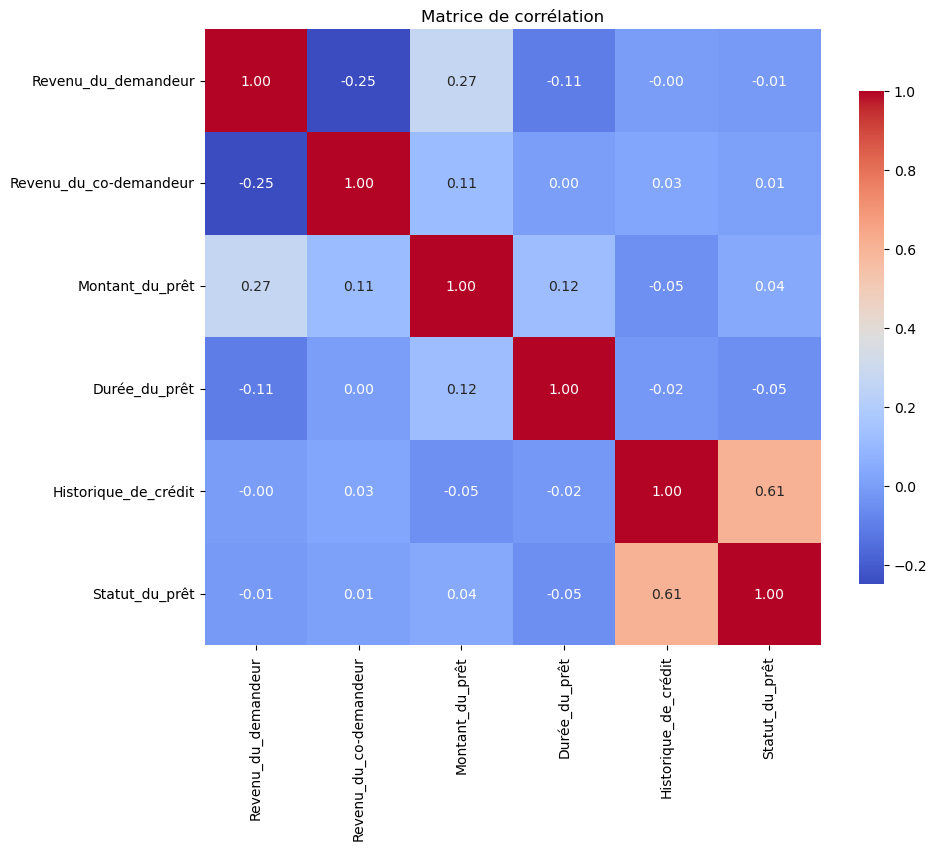

In [97]:
corr=df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matrice de corrélation")

In [104]:
df["Genre"]=df["Genre"].str.replace('Male','Masculin' )
df["Genre"]=df["Genre"].str.replace('Female','Feminin' )
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Masculin,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Masculin,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Masculin,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Masculin,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001013,Masculin,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Masculin,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,1.0
377,LP002974,Masculin,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,1.0
378,LP002978,Feminin,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
379,LP002979,Masculin,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,1.0


Text(0.5, 1.0, 'Répartition par genre selon le statut du prêt')

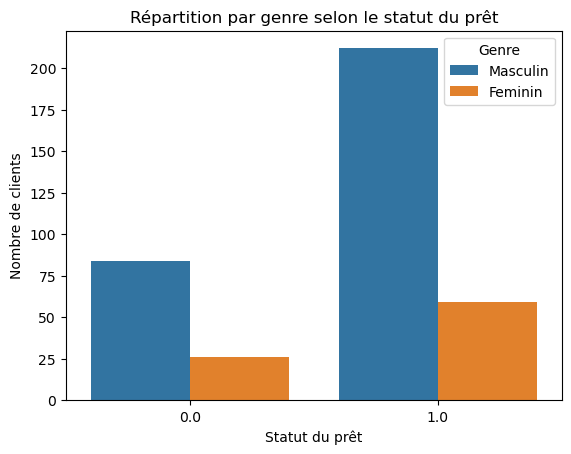

In [107]:
stat_genre=df.groupby("Statut_du_prêt")["Genre"].value_counts() 
bar=sns.countplot(data=df, x='Statut_du_prêt', hue='Genre')
plt.xlabel("Statut du prêt")
plt.ylabel("Nombre de clients")
plt.title("Répartition par genre selon le statut du prêt")

In [100]:
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Male,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Male,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Male,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Male,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001013,Male,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Male,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,1.0
377,LP002974,Male,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,1.0
378,LP002978,Female,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
379,LP002979,Male,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,1.0


Marié  Statut_du_prêt
Non    1.0               101
       0.0                52
Oui    1.0               170
       0.0                58
Name: count, dtype: int64


Text(0.5, 1.0, 'Statut du prêt par statut marital')

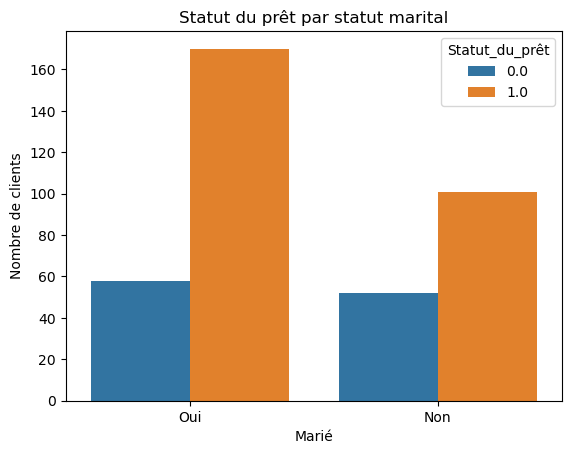

In [128]:
marie_stat=df.groupby('Marié')["Statut_du_prêt"].value_counts() 
print(marie_stat)
sns.countplot(data=df, x="Marié", hue="Statut_du_prêt")
plt.xlabel("Marié")  
plt.ylabel("Nombre de clients")
plt.title("Statut du prêt par statut marital")

In [122]:
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Masculin,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Masculin,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urban,1.0
2,LP001006,Masculin,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urban,1.0
3,LP001008,Masculin,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urban,1.0
4,LP001013,Masculin,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urban,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Masculin,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urban,1.0
377,LP002974,Masculin,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,1.0
378,LP002978,Feminin,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
379,LP002979,Masculin,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,1.0


In [124]:
df["Zone_propriété"]=df["Zone_propriété"].str.replace('Urban','Urbain' )
df["Zone_propriété"]=df["Zone_propriété"].str.replace('Rural','Rural' )
df["Zone_propriété"]=df["Zone_propriété"].str.replace('Semiurban','Semi-urbain' )

In [125]:
df

,Id_pret,Genre,Marié,Nombre_de_dépendants,Niveau_d_études,Travailleur_indépendant,Revenu_du_demandeur,Revenu_du_co-demandeur,Montant_du_prêt,Durée_du_prêt,Historique_de_crédit,Zone_propriété,Statut_du_prêt
0,LP001003,Masculin,Oui,1,Diplômé,Non,4583.0,1508.0,128.0,360.0,1.0,Rural,0.0
1,LP001005,Masculin,Oui,0,Diplômé,Oui,3000.0,0.0,66.0,360.0,1.0,Urbain,1.0
2,LP001006,Masculin,Oui,0,Non diplômé,Non,2583.0,2358.0,120.0,360.0,1.0,Urbain,1.0
3,LP001008,Masculin,Non,0,Diplômé,Non,6000.0,0.0,141.0,360.0,1.0,Urbain,1.0
4,LP001013,Masculin,Oui,0,Non diplômé,Non,2333.0,1516.0,95.0,360.0,1.0,Urbain,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,LP002953,Masculin,Oui,3+,Diplômé,Non,5703.0,0.0,128.0,360.0,1.0,Urbain,1.0
377,LP002974,Masculin,Oui,0,Diplômé,Non,3232.0,1950.0,108.0,360.0,1.0,Rural,1.0
378,LP002978,Feminin,Non,0,Diplômé,Non,2900.0,0.0,71.0,360.0,1.0,Rural,1.0
379,LP002979,Masculin,Oui,3+,Diplômé,Non,4106.0,0.0,40.0,180.0,1.0,Rural,1.0


In [126]:
df.to_csv(r'C:\Users\kouas\OneDrive\Documents\mes dataset\loan_data_cleaned_3.csv', index=False)